In [1]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import monai
from monai.transforms import Rotate, Zoom, ScaleIntensity, AdjustContrast
from monai.data import NiftiDataset
from monai.transforms import Compose,ToTensor

In [2]:
root_path = os.path.dirname(os.path.dirname(os.getcwd()))
os.chdir('../..')
root_path = os.getcwd()

preprocessed_data_path = root_path + '/processed_data'
preprocessed_data_mr_path = preprocessed_data_path + '/MR/'

mr_train = np.load(preprocessed_data_mr_path + 'training_mr_nifti.npy')
labels_train = np.load(preprocessed_data_mr_path + 'training_label.npy')


In [3]:
# create data loaders
train_transforms = Compose([ToTensor()])
train_ds = NiftiDataset(image_files=mr_train, labels=labels_train, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=1, shuffle=False, num_workers=0)


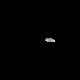
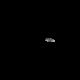
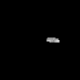
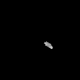
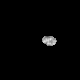
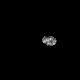
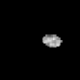
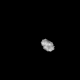
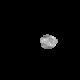
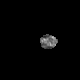
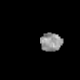
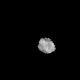
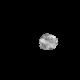
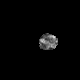
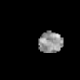
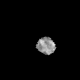
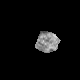
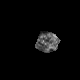
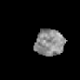
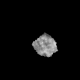
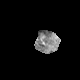
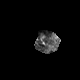
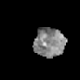
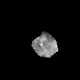
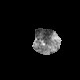
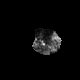
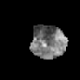
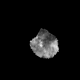
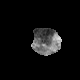
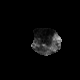
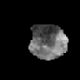
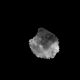
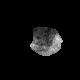
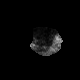
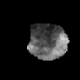
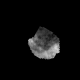
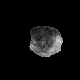
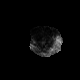
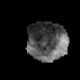
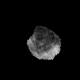
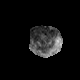
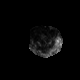
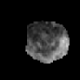
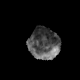
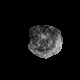
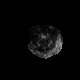
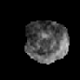
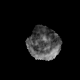
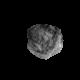
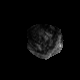
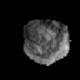
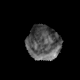
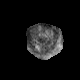
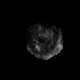
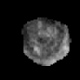
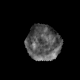
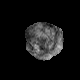
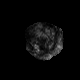
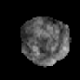
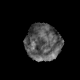
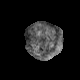
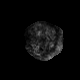
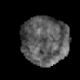
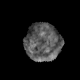
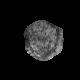
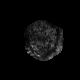
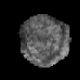
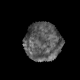
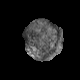
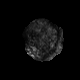
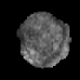
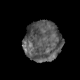
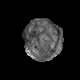
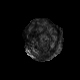
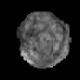
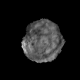
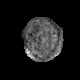
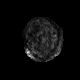
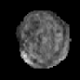
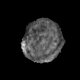
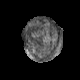
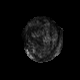
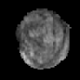
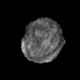
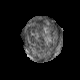
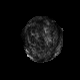
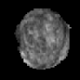
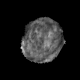
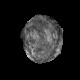
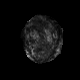
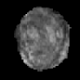
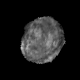
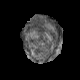
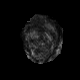
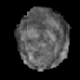
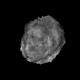
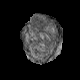
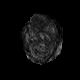
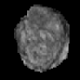
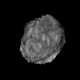
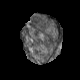
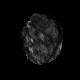
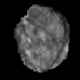
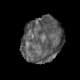
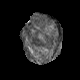
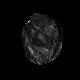
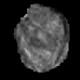
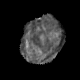
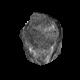
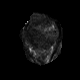
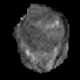
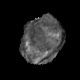
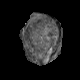
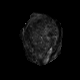
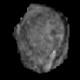
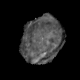
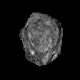
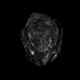
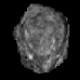
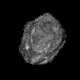
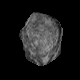
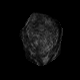
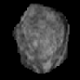
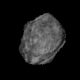
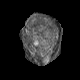
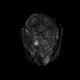
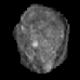
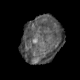
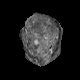
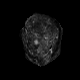
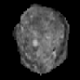
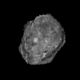
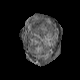
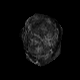
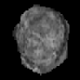
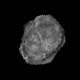
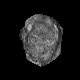
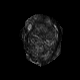
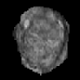
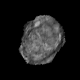
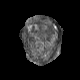
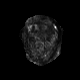
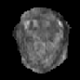
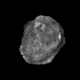
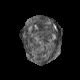
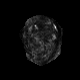
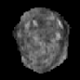
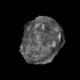
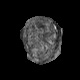
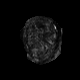
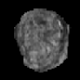
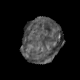
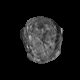
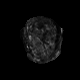
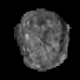
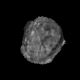
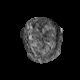
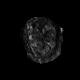
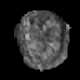
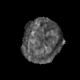
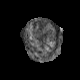
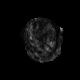
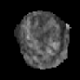
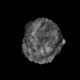
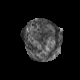
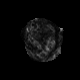
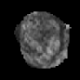
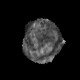
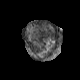
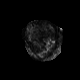
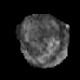
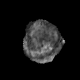
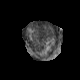
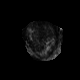
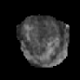
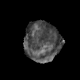
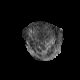
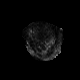
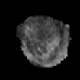
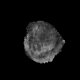
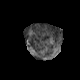
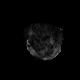
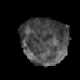
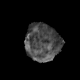
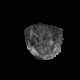
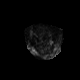
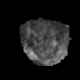
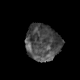
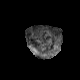
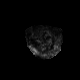
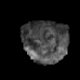
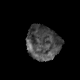
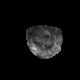
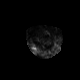
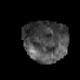
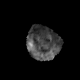
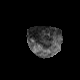
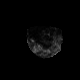
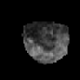
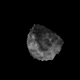
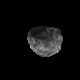
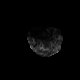
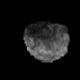
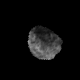
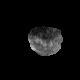
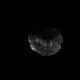
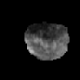
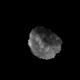
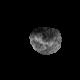
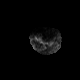
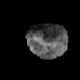
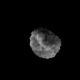
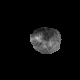
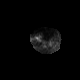
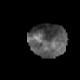
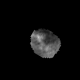
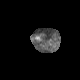
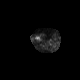
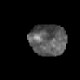
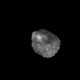
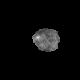
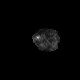
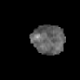
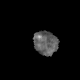
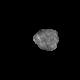
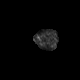
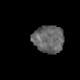
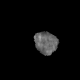
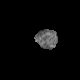
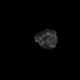
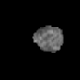
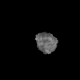
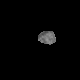
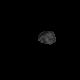
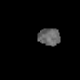
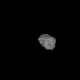
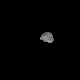
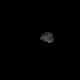
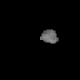
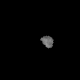

In [5]:
%matplotlib inline
n = 0
import plotly.express as px

for data in train_loader:
    n = n + 1
    if n == 3:
        img = data[0].squeeze().numpy()
        
        contrast = AdjustContrast(2.0)
        contrasted = contrast(img)
        
        zoom = Zoom(1.3)
        zoomed = zoom(img)
        
        rotation = Rotate(30)
        rotated = rotation(img)
        
        images = [img,contrasted,zoomed,rotated]
        
        
        
        stacked = np.stack(images,axis=0)
        stacked = np.swapaxes(stacked,0,1)
        stacked = np.rot90(stacked,k=1,axes=(2,3))
        fig = px.imshow(stacked, facet_col = 1, animation_frame=0, binary_string=True, labels=dict(animation_frame="slice"))
        
        names = ['Original','Gamma=2.0',"Zoom=1.3",'Rotate']
        fig.for_each_annotation(lambda a: a.update(text=names[int(a.text.split('=')[1])]))
        
        fig.show()
